In [2415]:
# make models
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
#read data
import numpy as np
import pandas as pd
#make plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns


In [2417]:
product_df = pd.read_csv('product_info.csv')
sales_df = pd.read_csv('sales_data.csv')

In [2419]:
product_df

,product_id,category,supplier_lead_time_days,current_inventory
0,P001,Toys,9,97
1,P002,Beauty,6,167
2,P003,Toys,13,47
3,P004,Toys,10,139
4,P005,Electronics,7,197
5,P006,Beauty,9,30
6,P007,Electronics,12,170
7,P008,Beauty,5,67
8,P009,Beauty,9,31
9,P010,Electronics,13,98


In [2421]:
sales_df

,date,product_id,units_sold,price_per_unit
0,2024-10-01,P001,7,64.90
1,2024-10-01,P002,1,84.99
2,2024-10-01,P003,3,26.40
3,2024-10-01,P004,1,77.98
4,2024-10-01,P005,0,61.09
...,...,...,...,...
3635,2025-03-31,P016,6,50.24
3636,2025-03-31,P017,9,18.40
3637,2025-03-31,P018,4,56.88
3638,2025-03-31,P019,6,96.05


In [2423]:
merged_data = pd.merge(sales_df,product_df, on='product_id')
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data


,date,product_id,units_sold,price_per_unit,category,supplier_lead_time_days,current_inventory
0,2024-10-01,P001,7,64.90,Toys,9,97
1,2024-10-01,P002,1,84.99,Beauty,6,167
2,2024-10-01,P003,3,26.40,Toys,13,47
3,2024-10-01,P004,1,77.98,Toys,10,139
4,2024-10-01,P005,0,61.09,Electronics,7,197
...,...,...,...,...,...,...,...
3635,2025-03-31,P016,6,50.24,Toys,10,199
3636,2025-03-31,P017,9,18.40,Home,5,199
3637,2025-03-31,P018,4,56.88,Home,8,184
3638,2025-03-31,P019,6,96.05,Home,7,199


In [2425]:
num_of_days = sales_df.shape[0]/product_df.shape[0]
num_of_days

182.0

## Sells By Different Categories (Exploratory Analysis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'P001'),
  Text(1, 0, 'P002'),
  Text(2, 0, 'P003'),
  Text(3, 0, 'P004'),
  Text(4, 0, 'P005'),
  Text(5, 0, 'P006'),
  Text(6, 0, 'P007'),
  Text(7, 0, 'P008'),
  Text(8, 0, 'P009'),
  Text(9, 0, 'P010'),
  Text(10, 0, 'P011'),
  Text(11, 0, 'P012'),
  Text(12, 0, 'P013'),
  Text(13, 0, 'P014'),
  Text(14, 0, 'P015'),
  Text(15, 0, 'P016'),
  Text(16, 0, 'P017'),
  Text(17, 0, 'P018'),
  Text(18, 0, 'P019'),
  Text(19, 0, 'P020')])

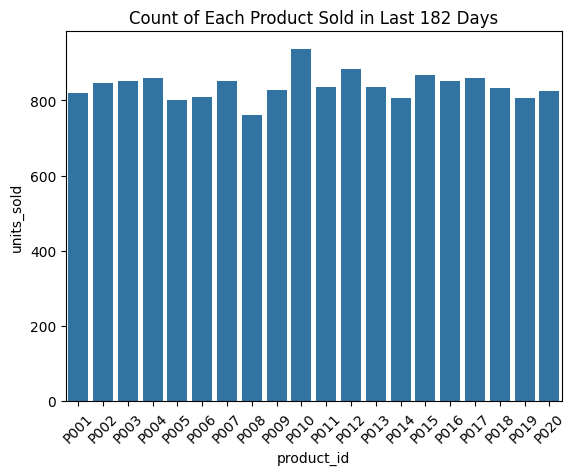

In [2428]:
product_sales = merged_data.groupby('product_id')['units_sold'].sum().reset_index().sort_values(by='product_id', ascending=True)
sns.barplot(data=product_sales, x='product_id', y='units_sold')
plt.title("Count of Each Product Sold in Last 182 Days")
plt.xticks(rotation=45)

In [2430]:
merged_data['revenue'] = merged_data['units_sold'] * merged_data['price_per_unit']
merged_data

,date,product_id,units_sold,price_per_unit,category,supplier_lead_time_days,current_inventory,revenue
0,2024-10-01,P001,7,64.90,Toys,9,97,454.30
1,2024-10-01,P002,1,84.99,Beauty,6,167,84.99
2,2024-10-01,P003,3,26.40,Toys,13,47,79.20
3,2024-10-01,P004,1,77.98,Toys,10,139,77.98
4,2024-10-01,P005,0,61.09,Electronics,7,197,0.00
...,...,...,...,...,...,...,...,...
3635,2025-03-31,P016,6,50.24,Toys,10,199,301.44
3636,2025-03-31,P017,9,18.40,Home,5,199,165.60
3637,2025-03-31,P018,4,56.88,Home,8,184,227.52
3638,2025-03-31,P019,6,96.05,Home,7,199,576.30


In [2432]:
#Analyzing Total Sells by Month
merged_data['month'] = merged_data['date'].dt.to_period('M')
monthly_sales = merged_data.groupby('month')['units_sold'].sum().reset_index()
monthly_sales

,month,units_sold
0,2024-10,2953
1,2024-11,2755
2,2024-12,2853
3,2025-01,2764
4,2025-02,2555
5,2025-03,2893


There doesn't seem to be any visible trend of increasing/decreasing of units sold due to months.

In [2435]:
category_sales = merged_data.groupby('category')[['units_sold','revenue']].sum().reset_index()
category_sales 

,category,units_sold,revenue
0,Beauty,4131,225175.56
1,Electronics,5119,285254.33
2,Home,3335,182491.67
3,Toys,4188,231374.61


In [2437]:
category_sales_units_sold = merged_data.groupby('category')['units_sold'].sum()


[]

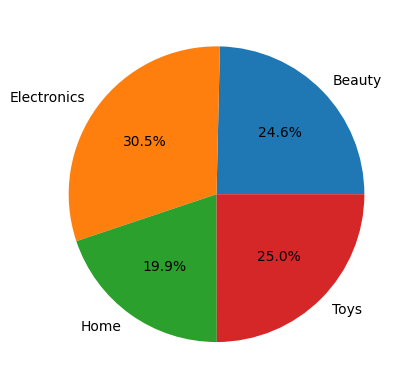

In [2439]:
plt.pie(category_sales_units_sold.values, labels=category_sales_units_sold.index, autopct='%1.1f%%')
plt.plot()

In [2441]:
category_sales_revenue = merged_data.groupby('category')['revenue'].sum()

[]

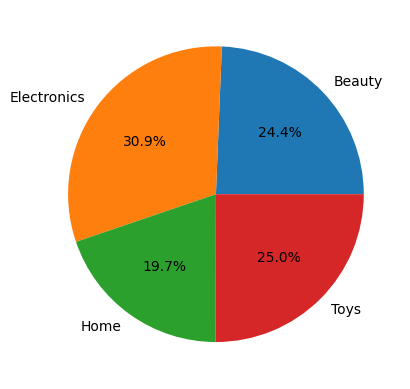

In [2443]:
plt.pie(category_sales_revenue.values, labels=category_sales_revenue.index, autopct='%1.1f%%')
plt.plot()

We see that electronics tend to be the highest selling and generating the most revenue while home supplies tend to be the lowest.

In [2446]:
avg_daily_sales = merged_data.groupby('product_id')['units_sold'].mean()
days_left = product_df.set_index('product_id')['current_inventory']/avg_daily_sales
lead_time = product_df.set_index('product_id')['supplier_lead_time_days']
stockout = days_left < lead_time
product_df['stockout?'] = stockout_flag.values
product_df

,product_id,category,supplier_lead_time_days,current_inventory,stockout?
0,P001,Toys,9,97,False
1,P002,Beauty,6,167,False
2,P003,Toys,13,47,True
3,P004,Toys,10,139,False
4,P005,Electronics,7,197,False
5,P006,Beauty,9,30,True
6,P007,Electronics,12,170,False
7,P008,Beauty,5,67,False
8,P009,Beauty,9,31,True
9,P010,Electronics,13,98,False


Using each product's estimated daily sales, we want to see which products are at high risk of running out of stock. A product will be classified as high risk of stockout if their estimated time left in stock is shorter than the supplier lead time. 

### Forecasting Demand for the Next 30 Days

In [2450]:
X = merged_data.drop(columns=['units_sold', 'date','month'])
y = merged_data['units_sold'] 

# One Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Loop through each product and forecast the next 30 days
forecast_results = []
model_accuracy = []


for product_id in merged_data['product_id'].unique():
    # Create a DF for each unique product_id and get columns up 
    product_data = merged_data[merged_data['product_id'] == product_id]
    # Select the X and y of the specific product_id
    X_product = X.loc[product_data.index]
    y_product = y.loc[product_data.index] 
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)

    # Make Predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate performance (MAE,MSE,Score (check by looking at the array of metrics later))
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = rf_model.score(X_test,y_test)
    model_accuracy.append([mae,mse,score])
    
    # Forecast the next 30 days for this product
    forecast_sales = []
    forecast_value = rf_model.predict(X_product).mean() #rf_model.predict(X_product) gives an array of predictions for each date in each product, so it's best to find mean of all the values
    forecast_sales.append(forecast_value) 
    
    # Store the forecast for this product
    forecast_df = pd.DataFrame(forecast_sales, columns=['forecasted_sales'])
    forecast_df['product_id'] = product_id
    forecast_results.append(forecast_df) 

# Concatenate all the product forecasts into one DF
all_forecasts_df = pd.concat(forecast_results) 
all_forecasts_df = all_forecasts_df.groupby(['product_id'])['forecasted_sales'].sum()
product_df['forecast_30_day'] = all_forecasts_df.values*30
product_df['lead_time_demand'] = (lead_time*avg_daily_sales).values


In [2451]:
#Calculate reorder quantity needed for stockout values by adding lead time demand and forecasted 30 day performance and subtracting current inventory
reorder_qty = (product_df['lead_time_demand'].values + product_df['forecast_30_day'].values - product_df['current_inventory'].values)
product_df['reorder_qty'] = np.ceil(reorder_qty)
product_df

,product_id,category,supplier_lead_time_days,current_inventory,stockout?,forecast_30_day,lead_time_demand,reorder_qty
0,P001,Toys,9,97,False,135.031319,40.549451,79.0
1,P002,Beauty,6,167,False,139.190110,27.923077,1.0
2,P003,Toys,13,47,True,139.994505,60.857143,154.0
3,P004,Toys,10,139,False,140.850000,47.197802,50.0
4,P005,Electronics,7,197,False,131.881319,30.807692,-34.0
5,P006,Beauty,9,30,True,132.947802,40.005495,143.0
6,P007,Electronics,12,170,False,139.925275,56.109890,27.0
7,P008,Beauty,5,67,False,125.164286,20.934066,80.0
8,P009,Beauty,9,31,True,136.284066,40.945055,147.0
9,P010,Electronics,13,98,False,154.232967,66.928571,124.0


In [2456]:
#If the product is not at risk of being out of stock, we don't have to worry about covering lead time demand
product_df['reorder_qty'] = product_df.apply(
    lambda df: np.ceil(df['reorder_qty'] - df['lead_time_demand']) if not df['stockout?'] else df['reorder_qty'], axis=1)
product_df['reorder_qty'] = product_df['reorder_qty'].clip(lower=0)
product_df

,product_id,category,supplier_lead_time_days,current_inventory,stockout?,forecast_30_day,lead_time_demand,reorder_qty
0,P001,Toys,9,97,False,135.031319,40.549451,0.0
1,P002,Beauty,6,167,False,139.190110,27.923077,0.0
2,P003,Toys,13,47,True,139.994505,60.857143,154.0
3,P004,Toys,10,139,False,140.850000,47.197802,0.0
4,P005,Electronics,7,197,False,131.881319,30.807692,0.0
5,P006,Beauty,9,30,True,132.947802,40.005495,143.0
6,P007,Electronics,12,170,False,139.925275,56.109890,0.0
7,P008,Beauty,5,67,False,125.164286,20.934066,40.0
8,P009,Beauty,9,31,True,136.284066,40.945055,147.0
9,P010,Electronics,13,98,False,154.232967,66.928571,0.0


The reorder quantity makes sense as the products that are at risk of stockout should be the highest in terms of reorder quantity. There are also products that should be reordered even if they won't be out of stock.

## Predicted Products in Demand

In [2460]:
#Check the mean accuracy of each model (MAE, MSE, Score)
mean_accuracies = np.mean(model_accuracy, axis=0)
print("Mean of each metric:", mean_accuracies)

Mean of each metric: [0.06273077 0.02434904 0.99689712]


For a good model, we want our mean absolute error and mean square error to be close to 0 and our model score to be near 100. For these means, we can see that our model does a good job of predicting the reorder quantity. 

Text(0.5, 1.0, 'Urgency of Reorder by Product ID')

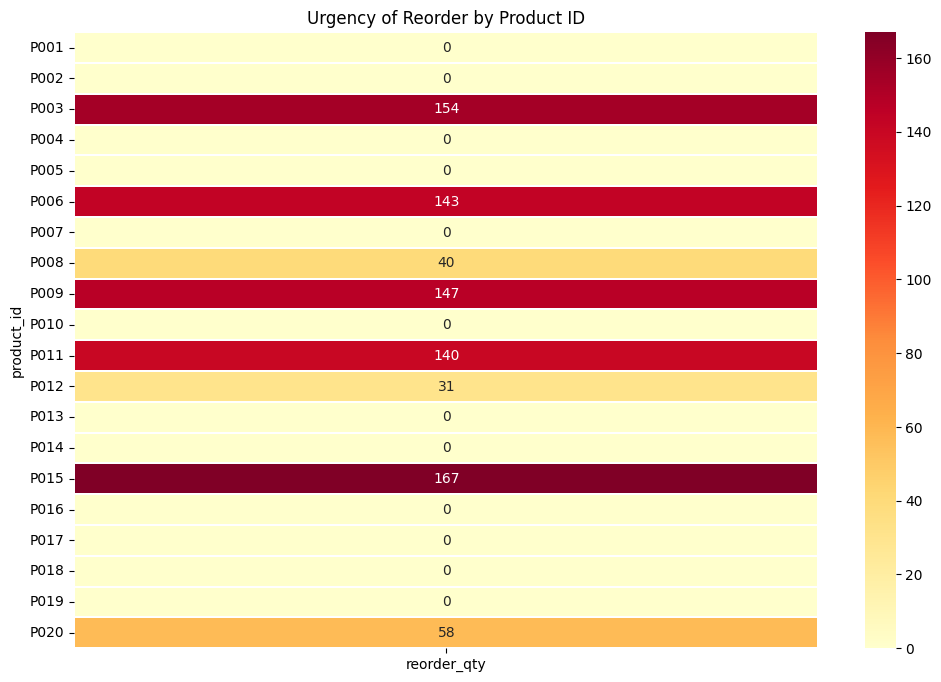

In [2463]:
# Pivot the data to create a heatmap (product_id vs reorder_qty)
plt.figure(figsize=(12, 8))
reorder_urgency_by_product = product_df.pivot_table(values='reorder_qty', index='product_id')
sns.heatmap(reorder_urgency_by_product, annot=True, cmap='YlOrRd', fmt='g',linewidths=0.1)
plt.title("Urgency of Reorder by Product ID")

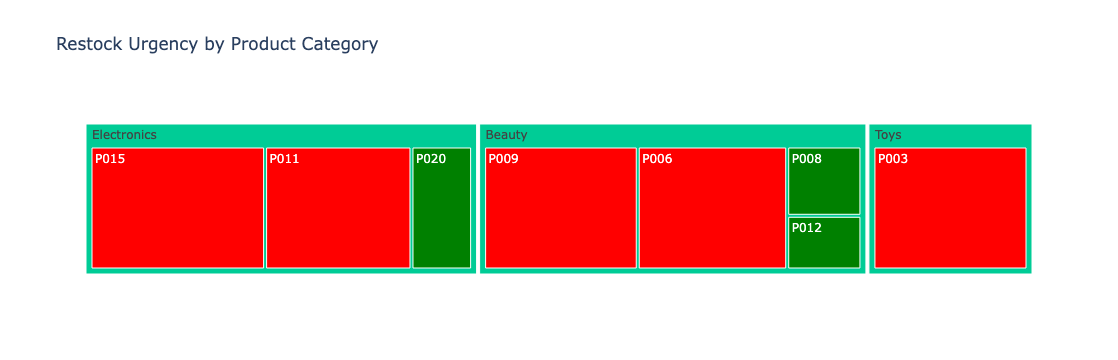

In [2465]:
fig = px.treemap(product_df, 
                 path=['category', 'product_id'], 
                 values='reorder_qty',
                 color='stockout?',
                 color_discrete_map={True: 'red', False: 'green'}, 
                 title='Restock Urgency by Product Category')
fig


## Conclusion

In the first figure (heatmap), the urgency of restock is given by the shade of red, with darker being more urgent. We also see the quantity of products we need to reorder in consideration of the forecasted 30 day prediction.

**We see that we should focus on reorder large amounts of product P003, P006, P009, P011, and P015 (with their amounts specified in the chart). These are the products that are at high risk of becoming out of stock. As for the other products, we need to order more as the forecasted sell of the products is more than what we currently have in the inventory.**


In the second figure (treemap), the restock urgency of each product is grouped into their product category. The size of each product gives the proportion of the quantity needed in comparison to others. A red box means the product is at high risk of stockout while the green isn't. 

Limitations: There can be unforeseen trends in the next 30 days that aren't accurately predicted by the random forest model. The random forest model also takes a considerable amount of time to generate predictions. Additionally, for further research, we might look into costs of ordering products as that information is not given.